<a href="https://colab.research.google.com/github/AndreNaufaldi29/23423019_Andre_Naufaldi/blob/main/Citradigital_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

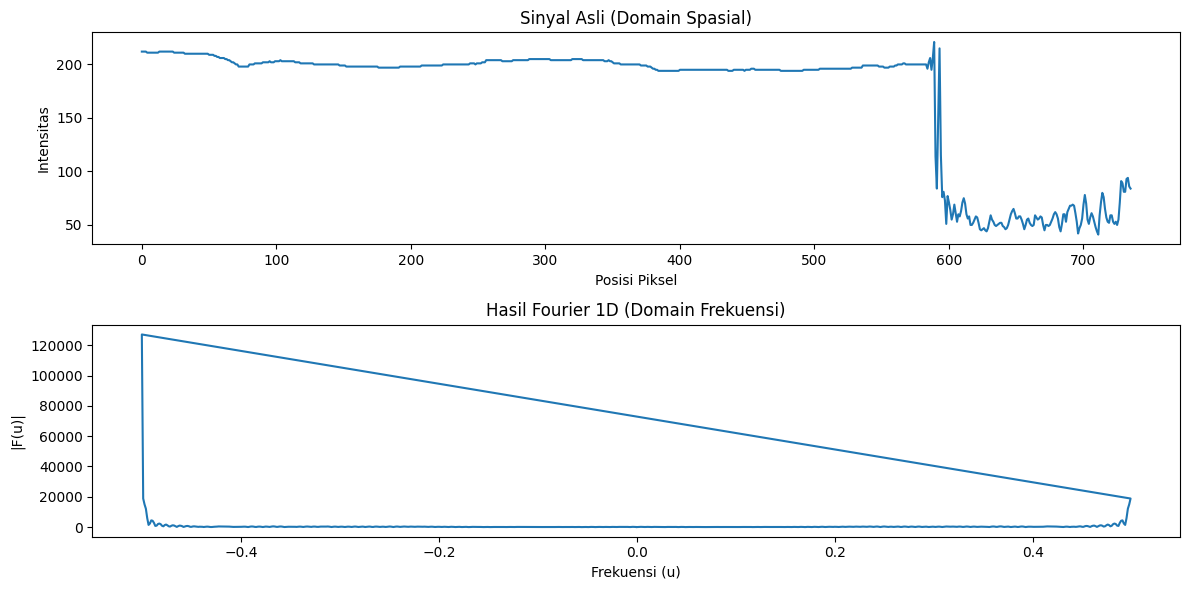

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('pemandangan.jpeg', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()

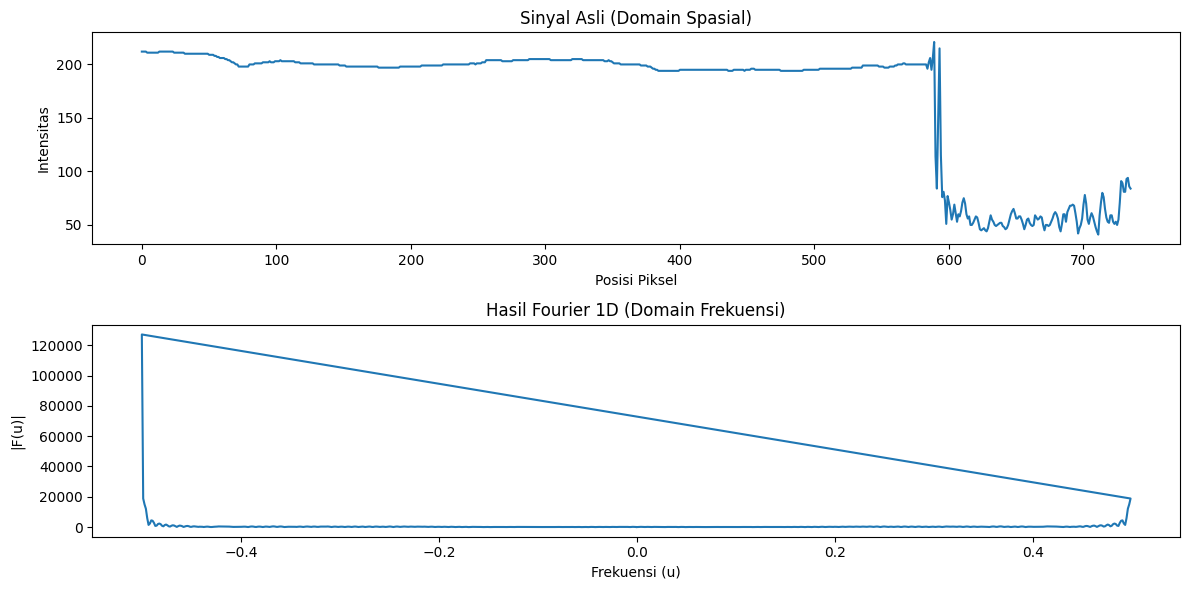

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('pemandangan.jpeg', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()

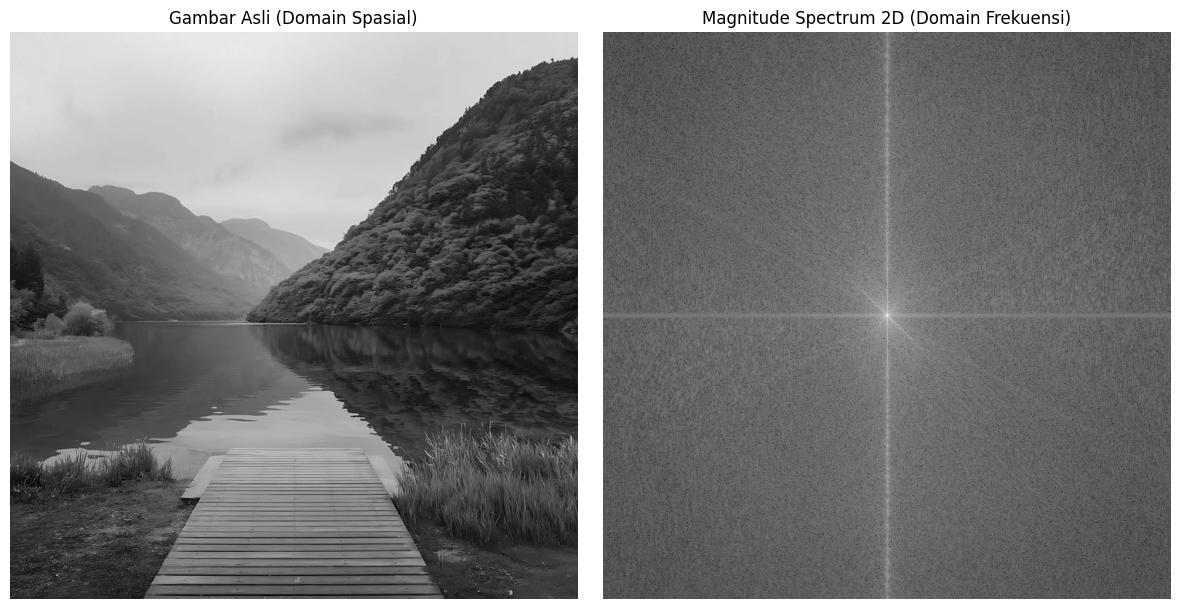

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar sebagai grayscale
img = cv2.imread('pemandangan.jpeg', 0)

if img is None:
    print("Error: Gambar 'pemandangan.jpeg' tidak ditemukan.")
else:
    # 2. Lakukan 2D Fourier Transform
    #    Hasilnya adalah array bilangan kompleks
    f = np.fft.fft2(img)

    # 3. Geser frekuensi nol (DC component) dari sudut kiri atas ke tengah
    #    Ini penting HANYA untuk keperluan visualisasi
    fshift = np.fft.fftshift(f)

    # 4. Hitung Magnitude Spectrum dan gunakan skala logaritmik
    #    Spektrum magnitudo = abs(fshift)
    #    Komponen DC (di tengah) biasanya JAUH lebih besar dari yang lain,
    #    sehingga kita perlu skala logaritmik (log(1 + ...)) untuk melihat detail frekuensi tinggi.
    magnitude_spectrum = np.log(1 + np.abs(fshift))

    # 5. Tampilkan hasil
    plt.figure(figsize=(12, 6))

    # Gambar Asli
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Gambar Asli (Domain Spasial)')
    plt.axis('off') # Sembunyikan sumbu x/y

    # Magnitude Spectrum (Domain Frekuensi)
    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title('Magnitude Spectrum 2D (Domain Frekuensi)')
    plt.axis('off') # Sembunyikan sumbu x/y

    plt.tight_layout()
    plt.show()

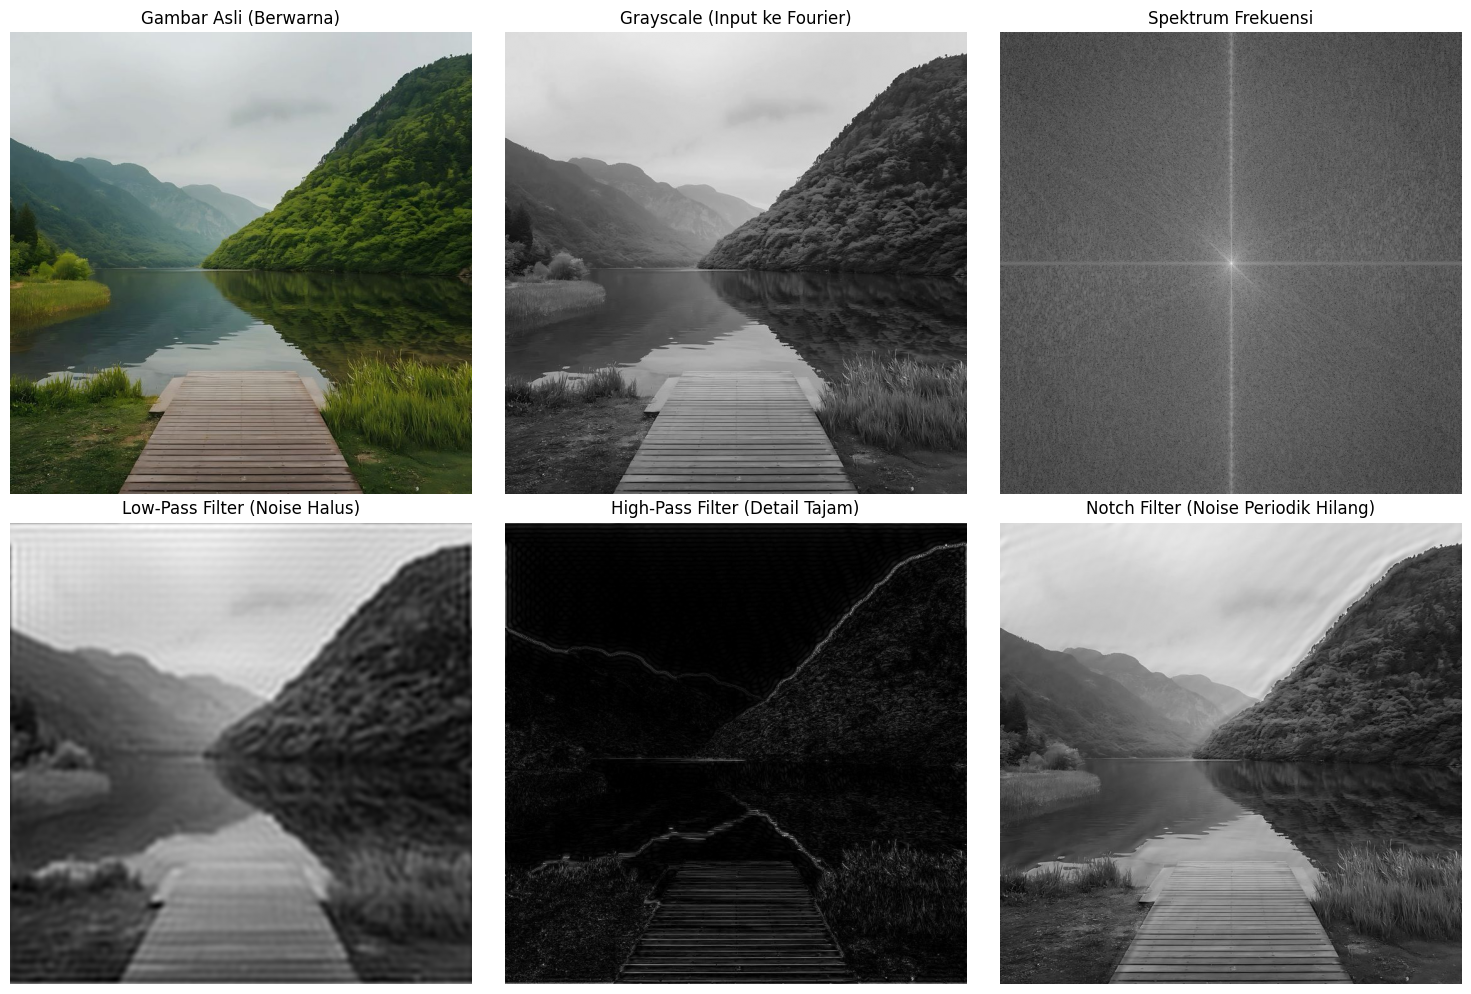

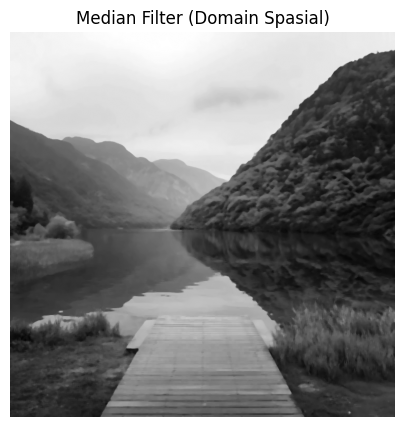

In [24]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Baca gambar berwarna ===
img_color = cv2.imread('pemandangan.jpeg')  # ganti sesuai path kamu
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# === 2. Ubah ke grayscale ===
img_gray = cv2.cvtColor(img_color, cv2.COLOR_RGB2GRAY)

# === 3. Transformasi Fourier ===
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)

rows, cols = img_gray.shape
crow, ccol = rows // 2, cols // 2

# ==================================================
#  LOW-PASS FILTER (menghaluskan / hilangkan noise)
# ==================================================
radius_lp = 50
mask_lp = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lp, (ccol, crow), radius_lp, 1, -1)

# Terapkan LPF
f_lp = fshift * mask_lp
img_lp = np.abs(np.fft.ifft2(np.fft.ifftshift(f_lp)))

# ==================================================
#  HIGH-PASS FILTER (menonjolkan tepi / detail)
# ==================================================
mask_hp = 1 - mask_lp
f_hp = fshift * mask_hp
img_hp = np.abs(np.fft.ifft2(np.fft.ifftshift(f_hp)))

# ==================================================
#  NOTCH FILTER (hilangkan frekuensi tertentu)
# ==================================================
mask_notch = np.ones((rows, cols), np.uint8)

# Contoh: hapus noise periodik di dua titik frekuensi (sesuaikan posisinya)
d = 20  # jari-jari lubang notch
cv2.circle(mask_notch, (ccol + 30, crow + 30), d, 0, -1)
cv2.circle(mask_notch, (ccol - 30, crow - 30), d, 0, -1)

# Terapkan Notch Filter
f_notch = fshift * mask_notch
img_notch = np.abs(np.fft.ifft2(np.fft.ifftshift(f_notch)))

# ==================================================
#  MEDIAN FILTER (domain spasial)
# ==================================================
img_median = cv2.medianBlur(img_gray, 5)  # kernel 5x5

# ==================================================
#  TAMPILKAN HASIL
# ==================================================
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.imshow(img_color)
plt.title('Gambar Asli (Berwarna)')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale (Input ke Fourier)')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(np.log(1 + np.abs(fshift)), cmap='gray')
plt.title('Spektrum Frekuensi')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(img_lp, cmap='gray')
plt.title('Low-Pass Filter (Noise Halus)')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(img_hp, cmap='gray')
plt.title('High-Pass Filter (Detail Tajam)')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(img_notch, cmap='gray')
plt.title('Notch Filter (Noise Periodik Hilang)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Tampilkan median filter terpisah
plt.figure(figsize=(6,5))
plt.imshow(img_median, cmap='gray')
plt.title('Median Filter (Domain Spasial)')
plt.axis('off')
plt.show()